In [91]:
#How many games were there and how many losers,draws and winners were there?
#What is the mean passing rate for winners, losers and draw?
import pandas as pd
df = pd.read_csv("passes (3).csv", delimiter=';')
df.dropna()
print('There were {} games in total'.format(df.game_id.nunique()))
df = df.dropna()

There were 153 games in total


In [92]:
df['winner'] = df.groupby('game_id')['winner'].transform(lambda x: 'Draw' if all(x == 'No') else x)
df[df['winner']=='Yes']['passing_quote'].describe()

count    114.000000
mean      81.078947
std        8.064063
min       53.000000
25%       76.250000
50%       83.000000
75%       87.000000
max       92.000000
Name: passing_quote, dtype: float64

In [93]:
df[df['winner']=='No']['passing_quote'].describe()  

count    114.000000
mean      79.263158
std        5.135427
min       63.000000
25%       76.000000
50%       79.000000
75%       83.000000
max       90.000000
Name: passing_quote, dtype: float64

In [94]:
df[df['winner']=='Draw']['passing_quote'].describe()

count    76.000000
mean     78.210526
std       7.250408
min      59.000000
25%      73.000000
50%      79.500000
75%      85.000000
max      89.000000
Name: passing_quote, dtype: float64

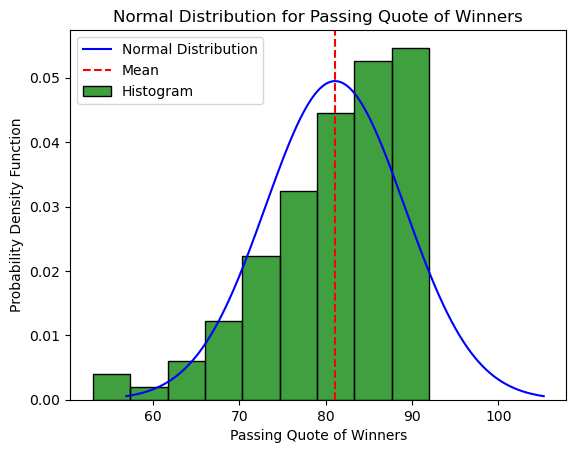

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Set the mean and standard deviation
mean = df[df['winner']=='Yes']['passing_quote'].mean()
std_dev = df[df['winner']=='Yes']['passing_quote'].std()

# Generate data points for the normal distribution curve
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
y = norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve using Seaborn
sns.histplot(df[df['winner']=='Yes']['passing_quote'], kde=False, stat='density', color='green', label='Histogram')
plt.plot(x, y, label='Normal Distribution', color='blue')

# Add a vertical line at the mean
plt.axvline(x=mean, color='red', linestyle='--', label='Mean')

# Add labels and a legend
plt.xlabel('Passing Quote of Winners')
plt.ylabel('Probability Density Function')
plt.title('Normal Distribution for Passing Quote of Winners')
plt.legend()

# Show the plot
plt.show()


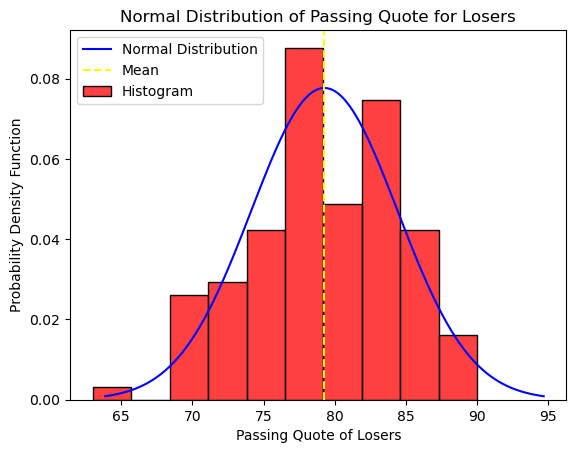

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Set the mean and standard deviation
mean = df[df['winner']=='No']['passing_quote'].mean()
std_dev = df[df['winner']=='No']['passing_quote'].std()

# Generate data points for the normal distribution curve
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
y = norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve using Seaborn
sns.histplot(df[df['winner']=='No']['passing_quote'], kde=False, stat='density', color='red', label='Histogram')
plt.plot(x, y, label='Normal Distribution', color='blue')

# Add a vertical line at the mean (changed color to yellow)
plt.axvline(x=mean, color='yellow', linestyle='--', label='Mean')

# Add labels and a legend
plt.xlabel('Passing Quote of Losers')
plt.ylabel('Probability Density Function')
plt.title('Normal Distribution of Passing Quote for Losers')
plt.legend()

# Show the plot
plt.show()


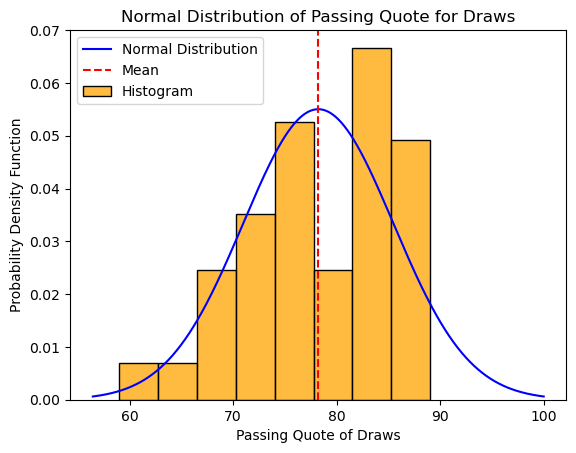

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Set the mean and standard deviation
mean = df[df['winner']=='Draw']['passing_quote'].mean()
std_dev = df[df['winner']=='Draw']['passing_quote'].std()

# Generate data points for the normal distribution curve
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
y = norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve using Seaborn
sns.histplot(df[df['winner']=='Draw']['passing_quote'], kde=False, stat='density', color='orange', label='Histogram')
plt.plot(x, y, label='Normal Distribution', color='blue')

# Add a vertical line at the mean (changed color to red)
plt.axvline(x=mean, color='red', linestyle='--', label='Mean')

# Add labels and a legend
plt.xlabel('Passing Quote of Draws')
plt.ylabel('Probability Density Function')
plt.title('Normal Distribution of Passing Quote for Draws')
plt.legend()

# Show the plot
plt.show()


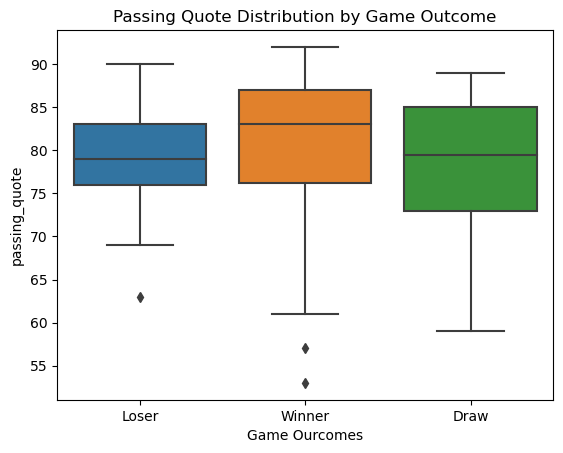

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the mapping of original categories to desired labels
category_mapping = {'Yes': 'Winner', 'No': 'Loser', 'Draw': 'Draw'}

# Map the 'winner' column to the desired labels
df['winner_mapped'] = df['winner'].map(category_mapping)

# Create a box plot using Seaborn with the mapped categories
sns.boxplot(x='winner_mapped', y='passing_quote', data=df, hue_order=['Winner', 'Loser', 'Draw'])

# Add labels and a title
plt.xlabel('Game Ourcomes')
plt.title('Passing Quote Distribution by Game Outcome')

# Show the plot
plt.show()


In [99]:
#Does winner have higher passing rate than losers?

C:\Users\F8AKN2Y\AppData\Local\Temp\1\ipykernel_25108\3580149748.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_passing_lost_abs['passing_rate_diff'] = lower_passing_lost_abs['passing_rate_diff'].abs()


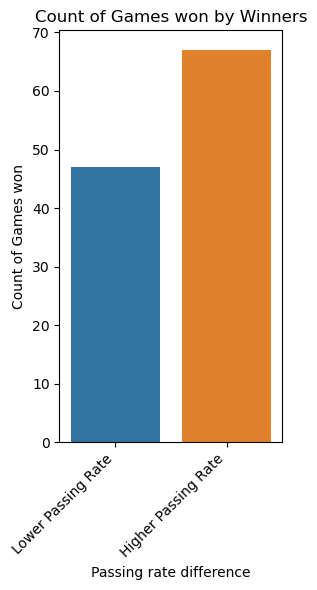

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
df.sort_values(['game_id', 'winner'], inplace=True)

# Calculate passing rate difference for both winner and loser rows within each game
df['passing_rate_diff'] = df.groupby('game_id')['passing_quote'].diff()
df['passing_rate_diff'] = df.groupby('game_id')['passing_rate_diff'].transform(lambda x: x.fillna(-x.dropna().iloc[0]))
df['passing_rate_gt_85'] = df['passing_quote'].apply(lambda x: 0 if x <85 else 1 )

lower_passing_lost = df.query('winner == "Yes" and passing_rate_diff < 0')
greater_equal_passing_lost = df.query('winner == "Yes" and passing_rate_diff >= 0')
lower_passing_lost_abs = lower_passing_lost
lower_passing_lost_abs['passing_rate_diff'] = lower_passing_lost_abs['passing_rate_diff'].abs()
# Aggregate data for each scenario
scenario_counts = {
    'Lower Passing Rate': len(lower_passing_lost_abs),
    'Higher Passing Rate': len(greater_equal_passing_lost)
}

# Create bar chart
plt.figure(figsize=(3, 6))
sns.barplot(x=list(scenario_counts.keys()), y=list(scenario_counts.values()))
plt.xlabel('Passing rate difference')
plt.ylabel('Count of Games won')
plt.title('Count of Games won by Winners')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [101]:
df

,game_id,passing_quote,winner,winner_mapped,passing_rate_diff,passing_rate_gt_85
0,11,72.0,No,Loser,-19.0,0
1,11,91.0,Yes,Winner,19.0,1
3,12,86.0,No,Loser,4.0,1
2,12,82.0,Yes,Winner,-4.0,0
5,13,79.0,No,Loser,-3.0,0
...,...,...,...,...,...,...
301,177,81.0,Yes,Winner,3.0,0
302,178,73.0,Draw,Draw,-1.0,0
303,178,74.0,Draw,Draw,1.0,0
305,179,89.0,No,Loser,15.0,1


In [102]:
#Explore combinations of passing_quote and passing_rate_diff thresholds to see if certain combinations are 
#more indicative of winning.
#For example, you could define categories like "High passing_quote and positive passing_rate_diff" 
#or "Low passing_quote and negative passing_rate_diff" and analyze the winning percentage for each combination.

In [103]:
df2 = df[df['winner'] != 'Draw' ]
df2

,game_id,passing_quote,winner,winner_mapped,passing_rate_diff,passing_rate_gt_85
0,11,72.0,No,Loser,-19.0,0
1,11,91.0,Yes,Winner,19.0,1
3,12,86.0,No,Loser,4.0,1
2,12,82.0,Yes,Winner,-4.0,0
5,13,79.0,No,Loser,-3.0,0
...,...,...,...,...,...,...
299,176,91.0,Yes,Winner,15.0,1
300,177,78.0,No,Loser,-3.0,0
301,177,81.0,Yes,Winner,3.0,0
305,179,89.0,No,Loser,15.0,1


In [104]:
y = df2['winner_mapped'].apply(lambda x: 0 if x == 'Loser' else 1 )

In [105]:
X = df2[['passing_quote','passing_rate_diff']]

In [106]:
y

0      0
1      1
3      0
2      1
5      0
      ..
299    1
300    0
301    1
305    0
304    1
Name: winner_mapped, Length: 228, dtype: int64

In [107]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# # Define the parameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_child_weight': [1, 5, 10,15],
#     'subsample': [0.6, 0.7, 0.8, 0.9],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
#     'n_estimators': [100, 200, 300, 400, 500]
# }

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize XGBoost classifier
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')

# # Perform grid search
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)




Accuracy: 0.8043478260869565
Confusion Matrix:
[[16  7]
 [ 2 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        23
           1       0.75      0.91      0.82        23

    accuracy                           0.80        46
   macro avg       0.82      0.80      0.80        46
weighted avg       0.82      0.80      0.80        46



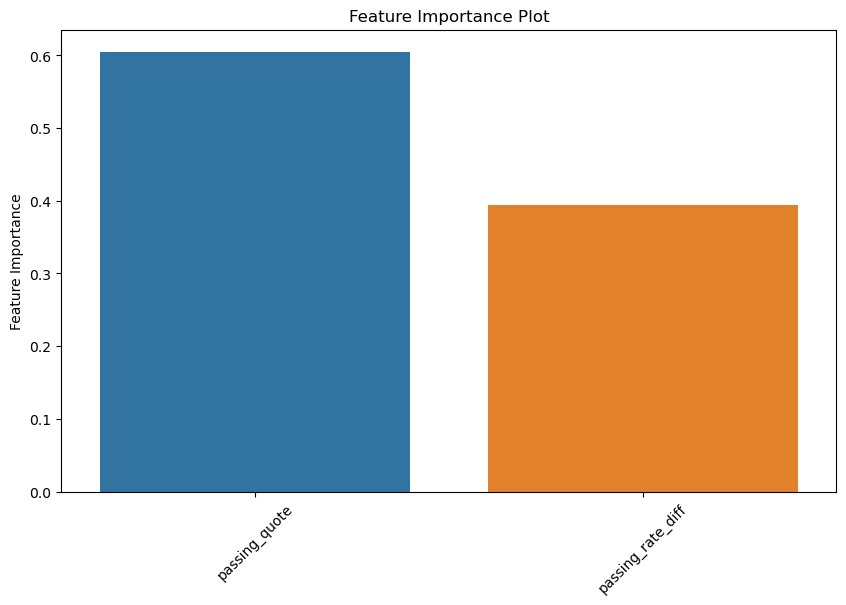

In [108]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#9923
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9926)

# Fit the model with the best parameters
best_xgb_model = xgb.XGBClassifier()
best_xgb_model.fit(X_train, y_train)

# Predictions
y_pred = best_xgb_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Displaying results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plotting feature importance
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=X.columns, y=best_xgb_model.feature_importances_, ax=ax)
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
ax.set_ylabel('Feature Importance')
ax.set_title('Feature Importance Plot')
plt.show()

In [109]:
# from xgboost import plot_tree
# import matplotlib.pyplot as plt

# # Assuming xgb_model is your trained XGBoost model
# # Plotting decision tree diagram with binary class labels in leaf values
# plt.figure(figsize=(20, 10))
# plot_tree(best_xgb_model, num_trees=0, rankdir='TB')
# fig = plt.gcf()
# fig.set_size_inches(150, 100)
# fig.savefig('tree.png')



In [110]:
from scipy.stats import ttest_ind

winners_passing_rates = df2[df2['winner'] == 'Yes']['passing_quote']
losers_passing_rates = df2[df2['winner'] == 'No']['passing_quote']
draw_passing_rates = df[df['winner'] == 'Draw']['passing_quote']

draw_passing_rates

8      85.0
9      77.0
24     65.0
25     76.0
32     67.0
       ... 
295    77.0
296    84.0
297    76.0
302    73.0
303    74.0
Name: passing_quote, Length: 76, dtype: float64

In [111]:
t_stat, p_value = ttest_ind(winners_passing_rates, losers_passing_rates)

if p_value < 0.05:
    print("There is a significant difference between the passing rates of winners and losers.")
    if t_stat > 0:
        print("Winners have a higher passing rate than losers.")
    else:
        print("Losers have a higher passing rate than winners.")
else:
    print("There is no significant difference between the passing rates of winners and losers.")

There is a significant difference between the passing rates of winners and losers.
Winners have a higher passing rate than losers.


In [112]:
#Difference in passing rate of games with winner vs Difference in passing rate of games with draw
#1. Mean of both; Box plot
#2. Hypothesis testing
#3. Hidden patterns within both to classify the difference.

In [113]:
df

,game_id,passing_quote,winner,winner_mapped,passing_rate_diff,passing_rate_gt_85
0,11,72.0,No,Loser,-19.0,0
1,11,91.0,Yes,Winner,19.0,1
3,12,86.0,No,Loser,4.0,1
2,12,82.0,Yes,Winner,-4.0,0
5,13,79.0,No,Loser,-3.0,0
...,...,...,...,...,...,...
301,177,81.0,Yes,Winner,3.0,0
302,178,73.0,Draw,Draw,-1.0,0
303,178,74.0,Draw,Draw,1.0,0
305,179,89.0,No,Loser,15.0,1


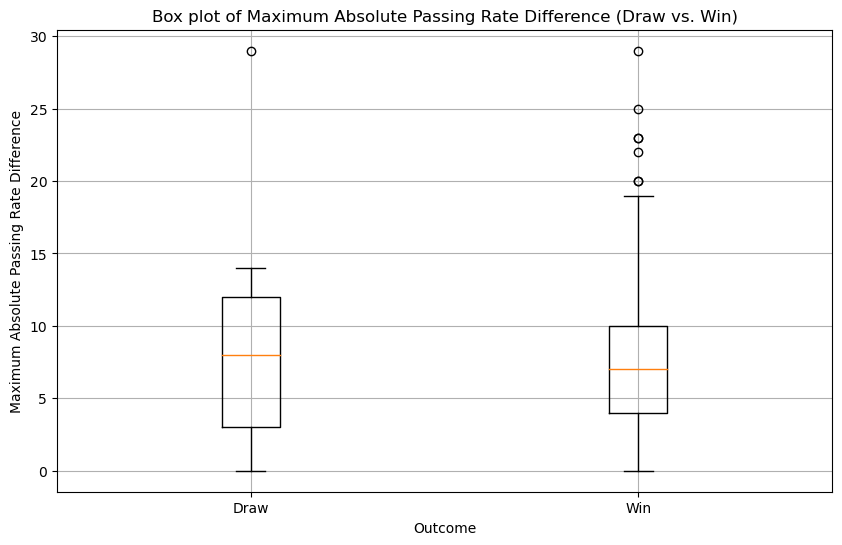

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns


draws = df[df['winner']=='Draw']
max_abs_passing_rate_diff_draw = draws.groupby('game_id')['passing_rate_diff'].apply(lambda x: max(abs(x)))

wins = df[df['winner']=='Yes']
max_abs_passing_rate_diff_win = wins.groupby('game_id')['passing_rate_diff'].apply(lambda x: max(abs(x)))


# Plotting box plot
plt.figure(figsize=(10, 6))
plt.boxplot([max_abs_passing_rate_diff_draw, max_abs_passing_rate_diff_win], labels=['Draw', 'Win'])
plt.title('Box plot of Maximum Absolute Passing Rate Difference (Draw vs. Win)')
plt.ylabel('Maximum Absolute Passing Rate Difference')
plt.xlabel('Outcome')
plt.grid(True)
plt.show()

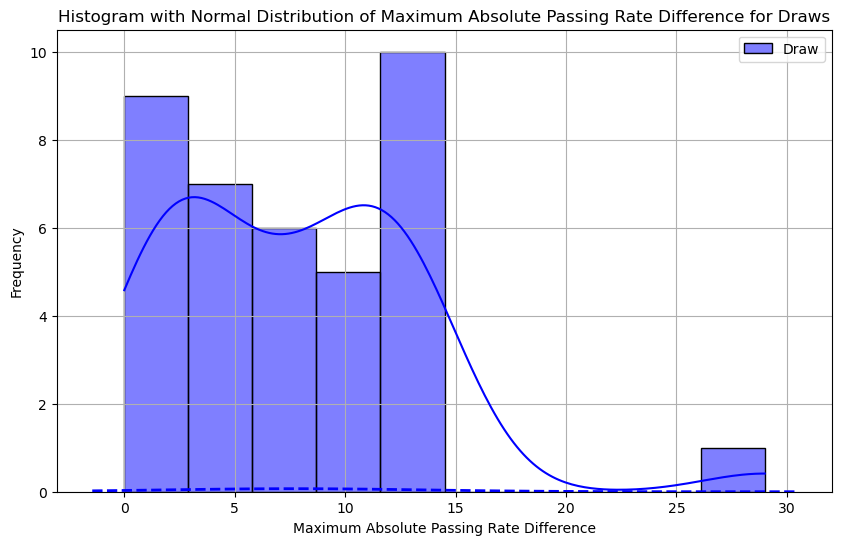

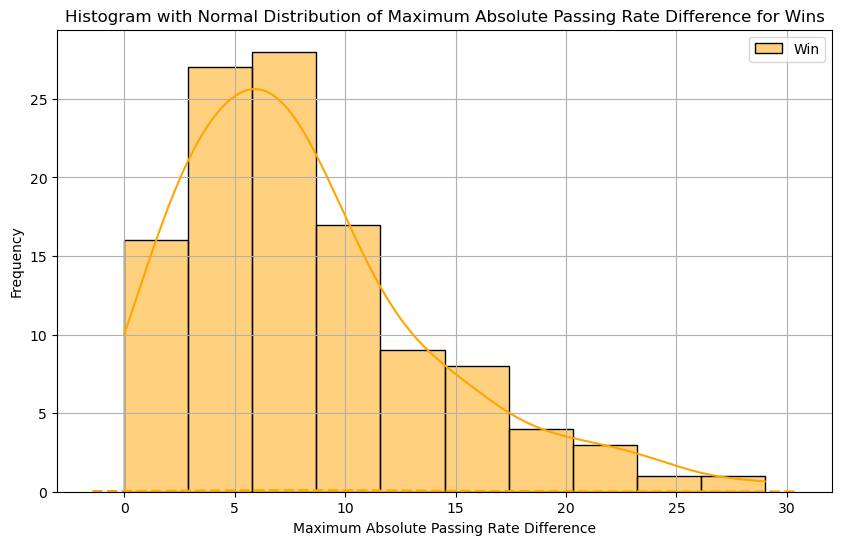

In [122]:
# Plot histogram with normal distribution curve for draws
plt.figure(figsize=(10, 6))
sns.histplot(max_abs_passing_rate_diff_draw, kde=True, color='blue', label='Draw', alpha=0.5, bins=10)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, max_abs_passing_rate_diff_draw.mean(), max_abs_passing_rate_diff_draw.std())
plt.plot(x, p, 'b--', linewidth=2)

plt.title('Histogram with Normal Distribution of Maximum Absolute Passing Rate Difference for Draws')
plt.xlabel('Maximum Absolute Passing Rate Difference')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot histogram with normal distribution curve for wins
plt.figure(figsize=(10, 6))
sns.histplot(max_abs_passing_rate_diff_win, kde=True, color='orange', label='Win', alpha=0.5, bins=10)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, max_abs_passing_rate_diff_win.mean(), max_abs_passing_rate_diff_win.std())
plt.plot(x, p, 'orange', linestyle='--', linewidth=2)

plt.title('Histogram with Normal Distribution of Maximum Absolute Passing Rate Difference for Wins')
plt.xlabel('Maximum Absolute Passing Rate Difference')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [115]:
max_abs_passing_rate_diff_draw.describe()

count    38.000000
mean      7.684211
std       5.798906
min       0.000000
25%       3.000000
50%       8.000000
75%      12.000000
max      29.000000
Name: passing_rate_diff, dtype: float64

In [116]:
max_abs_passing_rate_diff_win.describe()

count    114.000000
mean       8.166667
std        5.815628
min        0.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       29.000000
Name: passing_rate_diff, dtype: float64

In [123]:
t_stat, p_value = ttest_ind(max_abs_passing_rate_diff_win, max_abs_passing_rate_diff_draw)

if p_value < 0.05:
    print("There is a significant difference in passing rates between games with a winner and games that ended in a draw.")
    if t_stat > 0:
        print("Games with a winner have a higher passing rate than games that ended in a draw.")
    else:
        print("Games that ended in a draw have a higher passing rate than games with a winner.")
else:
    print("There is no significant difference in passing rates between games with a winner and games that ended in a draw.")

There is no significant difference in passing rates between games with a winner and games that ended in a draw.
